Census Income Data Set

Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.

Attribute Information:

Listing of attributes:

Income: >50K, <=50K.

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 

10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.


sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
IC=pd.read_csv('censusIncome.csv')

In [3]:
IC.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
IC.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [5]:
IC.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
IC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
IC[IC == '?'] = np.nan

In [8]:
IC.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [9]:
for col in ['workclass', 'occupation', 'native.country']:
    IC[col].fillna(IC[col].mode()[0], inplace=True)

In [10]:
IC.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [11]:
IC.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
IC.shape

(32561, 15)

In [13]:
# Set feature and target set seperatly 
x = IC.drop(['income'], axis=1)
y = IC['income']

In [14]:
x.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [16]:
# Encode categorical variables of feature dataset
from sklearn import preprocessing
categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        x_train[feature] = le.fit_transform(x_train[feature])
        x_test[feature] = le.transform(x_test[feature])

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x.columns)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import time

In [19]:
models = []
models.append(("LogisticRegression",LogisticRegression()))
models.append(("RF", RandomForestClassifier()))

In [20]:
results = []
names = []
for name,model in models:
    strat_fold = StratifiedKFold(n_splits=10, random_state=52, shuffle=True)
    cv_result = cross_val_score(model,x_train,y_train, cv = strat_fold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())
print('******************************************************************************************************')
for i in range(len(names)):
    print(names[i],results[i].std())

LogisticRegression 0.8259039244667175
RF 0.857274350861797
******************************************************************************************************
LogisticRegression 0.0038346268438881506
RF 0.0037127171062023155


In [21]:
# Specify parameters and distributions for Random Forest
rf_classification = RandomForestClassifier()
param_dist = dict(n_estimators=list(range(1,100)),
                  max_depth=list(range(1,100)),
                  min_samples_leaf=list(range(1,10)), random_state=list(range(42,242)), bootstrap=[True, False],
                  criterion = ["gini", "entropy"])
start_time = time.time()
rand_rf = RandomizedSearchCV(rf_classification, param_dist, cv=10)
rand_rf.fit(x_train, y_train)
training_time = time.time() - start_time
best_rf_classification = rand_rf.best_params_


print("Taining Time: ",training_time)
print("Best Parameters for Random Forest: ",best_rf_classification)

Taining Time:  156.78071641921997
Best Parameters for Random Forest:  {'random_state': 189, 'n_estimators': 58, 'min_samples_leaf': 4, 'max_depth': 67, 'criterion': 'gini', 'bootstrap': False}


*Test Accuracy: 86.16%
Classification Report: 
               precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      7410
        >50K       0.77      0.61      0.68      2359

    accuracy                           0.86      9769
   macro avg       0.83      0.78      0.80      9769
weighted avg       0.86      0.86      0.86      9769



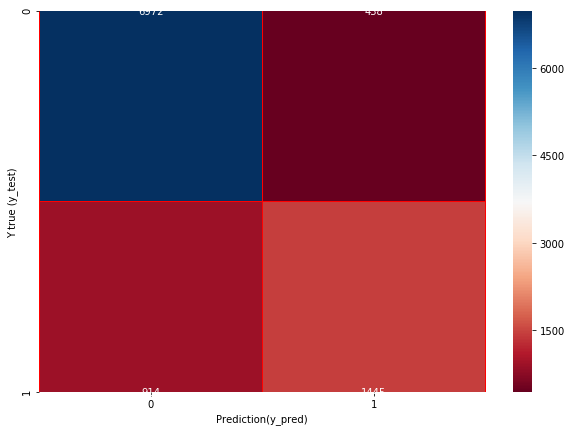

In [30]:
RF= RandomForestClassifier(random_state=189, n_jobs=-1,
                          n_estimators=58,min_samples_leaf = 5, max_depth=67,
                           criterion='gini',bootstrap=False)

rf = RF.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)
print("*Test Accuracy: {}%".format(round(rf.score(x_test,y_test)*100,2)))
print("Classification Report: \n {}".format (classification_report(y_test, y_pred_rf)))

# visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
f, ax = plt.subplots(figsize=(10,7))
sns.heatmap(conf_matrix,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax, cmap='RdBu')
plt.xlabel("Prediction(y_pred)")
plt.ylabel("Y true (y_test)")
plt.show()

# Random Forest with with PCA

In [31]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(x_train)
pca.explained_variance_ratio_

array([0.15794338, 0.1157912 , 0.09430067, 0.08721907, 0.08574678,
       0.08407024, 0.07888033, 0.0780812 , 0.07513892, 0.06031702,
       0.050501  , 0.03201017])

Explained Variance Ratio
A very useful piece of information is the explained variance ratio of each principal component. It is available via the explained_variance_ratio_ variable. It indicates the proportion of the dataset’s variance that lies along the axis of each principal component.

We can see that majority of variance is explained by the first 13 variables.
Only few of variance is explained by the last variable. So, we can assume that it carries little information.
So, we can drop it, train the model again and calculate the accuracy.

Lets Train Random Forest with 13 features 

Random Forest accuracy score with the 13 features: 0.8612
Classification Report with 11 features: 
               precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      7410
        >50K       0.77      0.61      0.68      2359

    accuracy                           0.86      9769
   macro avg       0.83      0.78      0.80      9769
weighted avg       0.86      0.86      0.86      9769



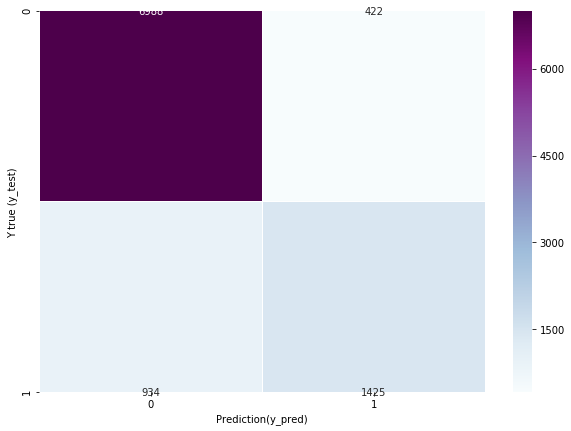

In [32]:
x = IC.drop(['income','native.country'], axis=1)
y = IC['income']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)


categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        x_train[feature] = le.fit_transform(x_train[feature])
        x_test[feature] = le.transform(x_test[feature])


x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)

x_test = pd.DataFrame(scaler.transform(x_test), columns = x.columns)

# Trained with Random Forest with optimized paprameter with RandomizedSearchCV
RF.fit(x_train, y_train)
y_pred_rpca = RF.predict(x_test)

print('Random Forest accuracy score with the 13 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred_rpca)))
print("Classification Report with 11 features: \n {}".format (classification_report(y_test, y_pred_rf)))

# visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rpca)
f, ax = plt.subplots(figsize=(10,7))
sns.heatmap(conf_matrix,annot = True, linewidths=0.5,linecolor="white",fmt=".0f",ax=ax, cmap='BuPu')
plt.xlabel("Prediction(y_pred)")
plt.ylabel("Y true (y_test)")
plt.show()

Lets Train Random Forest with 11 feature sets 

Random Forest accuracy score with the 11 features: 0.8512
Classification Report with 11 features: 
               precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      7410
        >50K       0.77      0.61      0.68      2359

    accuracy                           0.86      9769
   macro avg       0.83      0.78      0.80      9769
weighted avg       0.86      0.86      0.86      9769



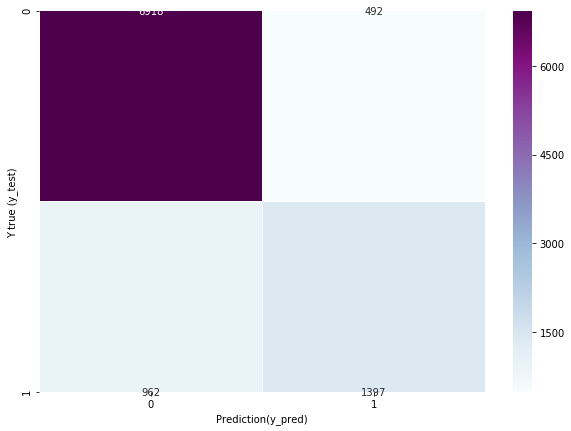

In [33]:
x = IC.drop(['income','native.country', 'hours.per.week', 'capital.loss'], axis=1)
y = IC['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)


categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        x_train[feature] = le.fit_transform(x_train[feature])
        x_test[feature] = le.transform(x_test[feature])


x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)

x_test = pd.DataFrame(scaler.transform(x_test), columns = x.columns)

# Trained with Random Forest with optimized paprameter with RandomizedSearchCV
RF.fit(x_train, y_train)
y_pred_rpca = RF.predict(x_test)

print('Random Forest accuracy score with the 11 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred_rpca)))
print("Classification Report with 11 features: \n {}".format (classification_report(y_test, y_pred_rf)))

# visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rpca)
f, ax = plt.subplots(figsize=(10,7))
sns.heatmap(conf_matrix,annot = True, linewidths=0.5,linecolor="white",fmt=".0f",ax=ax, cmap='BuPu')
plt.xlabel("Prediction(y_pred)")
plt.ylabel("Y true (y_test)")
plt.show()

Model accuracy with 13 fatures is 86.05% whereas with 11 feature set We can see that accuracy has decreased by 1 %.
Our aim is to maximize the accuracy.The following code establised PCA without reducing dimensionality, then computes the minimum number of dimensions required to preserve more than 90% of the training datset set variance.

The number of dimensions required to preserve 90% of variance is 12


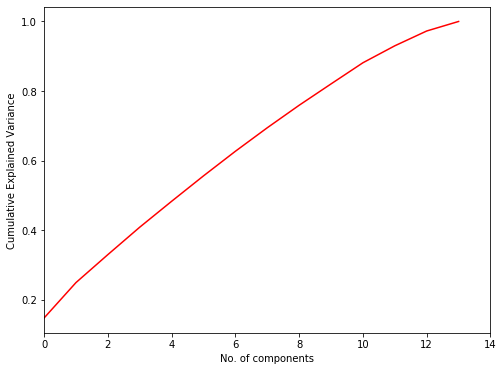

In [39]:
x = IC.drop(['income'], axis=1)
y = IC['income']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)


categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for fe in categorical:
        le = preprocessing.LabelEncoder()
        x_train[fe] = le.fit_transform(x_train[fe])
        x_test[fe] = le.transform(x_test[fe])


x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)


pca= PCA()
pca.fit(x_train)
cum_sum = np.cumsum(pca.explained_variance_ratio_)
dimension = np.argmax(cum_sum >= 0.90) + 1
print('The number of dimensions required to preserve 90% of variance is',dimension)

# Analysis variance ratio with number of dimensions
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='red')
plt.xlim(0,14,1)
plt.xlabel('No. of components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

Random Forest accuracy score with the 12 features: 0.8616
Classification Report with 12 features: 
               precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      7410
        >50K       0.77      0.61      0.68      2359

    accuracy                           0.86      9769
   macro avg       0.83      0.78      0.80      9769
weighted avg       0.86      0.86      0.86      9769



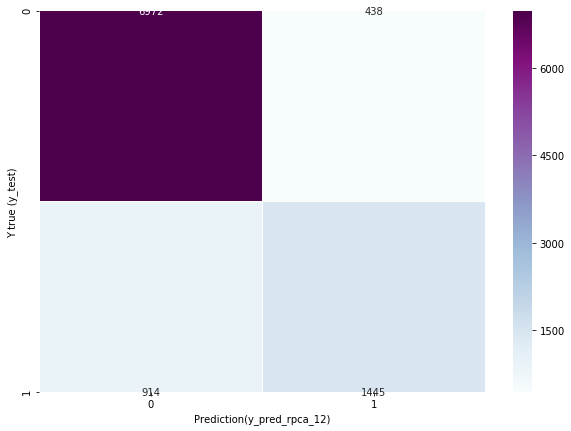

In [37]:
x = IC.drop(['income','native.country', 'hours.per.week'], axis=1)
y = IC['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)


categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        x_train[feature] = le.fit_transform(x_train[feature])
        x_test[feature] = le.transform(x_test[feature])


x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)

x_test = pd.DataFrame(scaler.transform(x_test), columns = x.columns)

# Trained with Random Forest with optimized paprameter with RandomizedSearchCV
RF.fit(x_train, y_train)
y_pred_rpca_12 = RF.predict(x_test)

print('Random Forest accuracy score with the 12 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred_rpca_12)))
print("Classification Report with 12 features: \n {}".format (classification_report(y_test, y_pred_rpca_12)))

# visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rpca_12)
f, ax = plt.subplots(figsize=(10,7))
sns.heatmap(conf_matrix,annot = True, linewidths=0.5,linecolor="white",fmt=".0f",ax=ax, cmap='BuPu')
plt.xlabel("Prediction(y_pred_rpca_12)")
plt.ylabel("Y true (y_test)")
plt.show()

It has been clearly indicated form the above analysis that 12 components from the independent variable space are sufficient to attain 86% of accuracy the same level of score has been attained when all independent variable used to train the model. 

In [38]:
# Create the submission file using naive_bayes GaussianNB and submit the file.
preds = pd.DataFrame(y_pred_rpca_12, columns=['IC_pred'])
preds.to_csv('Income_Census.csv')